In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [ ]:
mnist=keras.datasets.mnist

In [ ]:
(train_features,train_labels),(test_features,test_labels)=mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
train_features.shape,train_labels.shape

((60000, 28, 28), (60000,))

In [ ]:
test_features.shape

(10000, 28, 28)

5


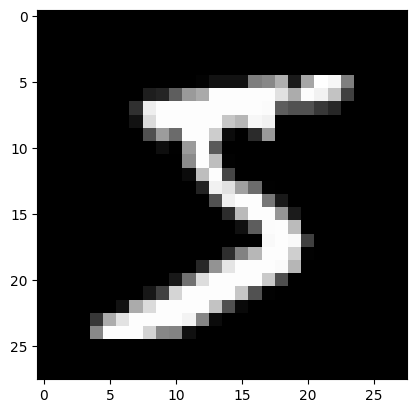

In [ ]:
idx=0
img=train_features[idx]
print(train_labels[idx])
plt.gray()
plt.imshow(img)

**preprocessing**

In [ ]:
np.min(img),np.max(img)

(0, 255)

In [ ]:
train_features=train_features/255.0
test_features=test_features/255.0

**model** **definition**

In [ ]:
model=keras.Sequential()
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=128,activation='relu'))
model.add(keras.layers.Dense(units=128,activation='relu'))
model.add(keras.layers.Dense(units=10,activation='softmax'))

In [ ]:
model.compile(optimizer=tf.optimizers.Adam(),loss=tf.losses.sparse_categorical_crossentropy,metrics=['accuracy'])

In [ ]:
early_stop=keras.callbacks.EarlyStopping(monitor='val_loss',patience=50,restore_best_weights=True)

In [ ]:
model.build(input_shape=(None,28,28))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
hist=model.fit(train_features,train_labels,epochs=1000,batch_size=256,callbacks=[early_stop],validation_data=(test_features,test_labels))

Epoch 1/1000
235/235 [==============================] - 1s 4ms/step - loss: 4.3511e-10 - accuracy: 1.0000 - val_loss: 0.2706 - val_accuracy: 0.9820
Epoch 2/1000
235/235 [==============================] - 1s 4ms/step - loss: 4.4306e-10 - accuracy: 1.0000 - val_loss: 0.2711 - val_accuracy: 0.9819
Epoch 3/1000
235/235 [==============================] - 1s 4ms/step - loss: 4.4306e-10 - accuracy: 1.0000 - val_loss: 0.2714 - val_accuracy: 0.9820
Epoch 4/1000
235/235 [==============================] - 1s 4ms/step - loss: 4.5101e-10 - accuracy: 1.0000 - val_loss: 0.2717 - val_accuracy: 0.9821
Epoch 5/1000
235/235 [==============================] - 1s 4ms/step - loss: 4.6094e-10 - accuracy: 1.0000 - val_loss: 0.2719 - val_accuracy: 0.9820
Epoch 6/1000
235/235 [==============================] - 1s 4ms/step - loss: 4.3511e-10 - accuracy: 1.0000 - val_loss: 0.2724 - val_accuracy: 0.9821
Epoch 7/1000
235/235 [==============================] - 1s 4ms/step - loss: 4.6094e-10 - accuracy: 1.0000 - val_

6


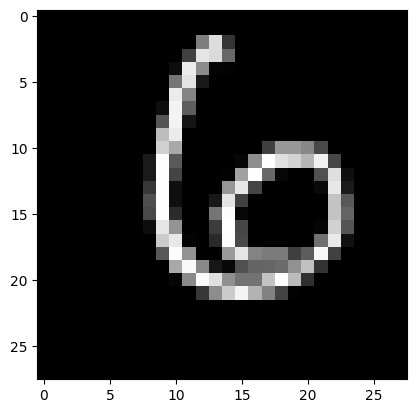

In [ ]:
idx=100
img=test_features[idx]
print(test_labels[idx])
plt.gray()
plt.imshow(img)

In [ ]:
model.predict(np.reshape(img,(-1,784)))

1/1 [==============================] - 0s 102ms/step


array([[1.1408701e-28, 2.4300671e-33, 1.5672221e-26, 0.0000000e+00,
        1.1805288e-37, 7.2041057e-38, 1.0000000e+00, 0.0000000e+00,
        1.9610464e-28, 0.0000000e+00]], dtype=float32)

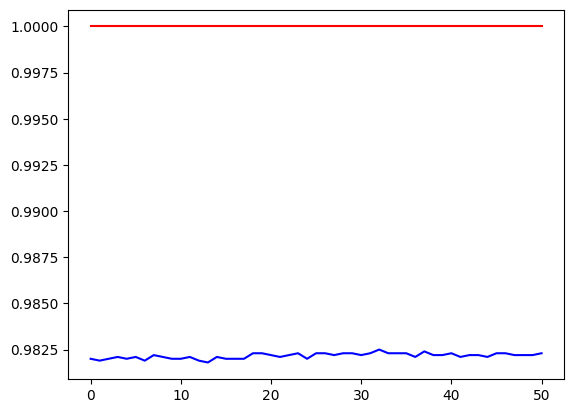

In [ ]:
acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']
plt.plot(acc,color='red')
plt.plot(val_acc,color='blue')
plt.show()

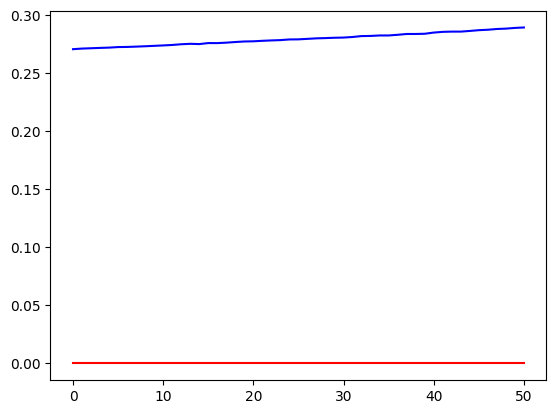

In [ ]:
loss=hist.history['loss']
val_loss=hist.history['val_loss']
plt.plot(loss,color='red')
plt.plot(val_loss,color='blue')
plt.show()